In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants, units
from astropy.coordinates import Angle
from scipy.optimize import curve_fit
import pandas as pd
import os
from scipy.signal import medfilt

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/'

Load in the segmentation map for galaxy IDs

In [4]:
cat_file = np.loadtxt(rootdir + 'test_new_updated.cat')

In [5]:
gal_ids_arr = np.int_(cat_file[:,0])

In [6]:
len(gal_ids_arr)

80

In [7]:
z_ids_arr = cat_file[:,12]

Print coordinates for all systems

In [8]:
for i in range(len(gal_ids_arr)):
    
    print(gal_ids_arr[i], cat_file[i,3], cat_file[i,4])

1 76.8023 29.5341
2 116.6069 25.0939
3 276.3172 16.8158
5 135.7645 16.0164
18 141.833 287.2714
19 235.054 314.4963
20 253.5729 310.9191
23 258.9547 294.371
25 280.8123 284.8661
26 308.5022 284.0549
27 212.1108 276.937
28 200.9968 269.9938
30 191.8261 266.1579
32 281.3693 258.4461
33 168.2347 259.0545
34 267.6346 255.0338
35 35.9807 256.8017
36 82.2875 249.1346
38 241.7247 249.0174
39 39.6901 246.0048
40 149.3132 241.2432
42 218.6218 236.8814
43 244.7527 234.8129
44 190.4201 233.2706
45 97.1164 221.572
47 51.3758 222.2374
48 194.2899 207.7421
49 189.9632 199.56
50 130.6096 171.2798
51 147.2826 204.0519
52 155.4582 185.0759
56 83.593 190.8463
57 12.6605 189.9396
58 239.9109 187.3473
59 247.4627 182.4691
61 49.3002 183.4236
64 220.2909 160.2288
65 237.3401 157.7542
66 115.8683 152.1205
67 275.9 150.3787
68 261.6685 152.0977
69 99.3038 143.9752
70 316.2942 136.8867
72 47.4602 106.3485
73 35.6737 122.5812
74 26.617 107.7284
75 301.0899 135.4059
76 208.9262 129.7405
77 123.8767 126.9529
78 2

Load in the atomic lines

In [9]:
atom_lines = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/galaxy.dat',
                       dtype=str)

In [10]:
atom_lines_names = atom_lines[:,1]

In [11]:
atom_lines_wavs = np.float_(atom_lines[:,0])

In [12]:
atom_line_types = atom_lines[:,2]

In [13]:
atom_line_legends = [atom_lines_names[i]+str(int(np.round(atom_lines_wavs[i]))) for i in range(len(atom_lines_names))]

Plot galaxy spectrum with atomic lines

In [14]:
gal_id = 45

In [15]:
idx = np.where(gal_ids_arr==gal_id)[0][0]

In [16]:
z_best = z_ids_arr[idx]

In [17]:
gal_spec_arr = np.loadtxt(rootdir+'gal{}/gal{}_spec.dat'.format(gal_id, gal_id), delimiter='\t')

In [18]:
wav_arr = gal_spec_arr[:,0]
gal_spec_raw = gal_spec_arr[:,1]
gal_spec_err = gal_spec_arr[:,2]
gal_spec_fit = gal_spec_arr[:,3]

In [19]:
color_dict = {'a': 'red', 'e': 'blue', 'b': 'gray'}

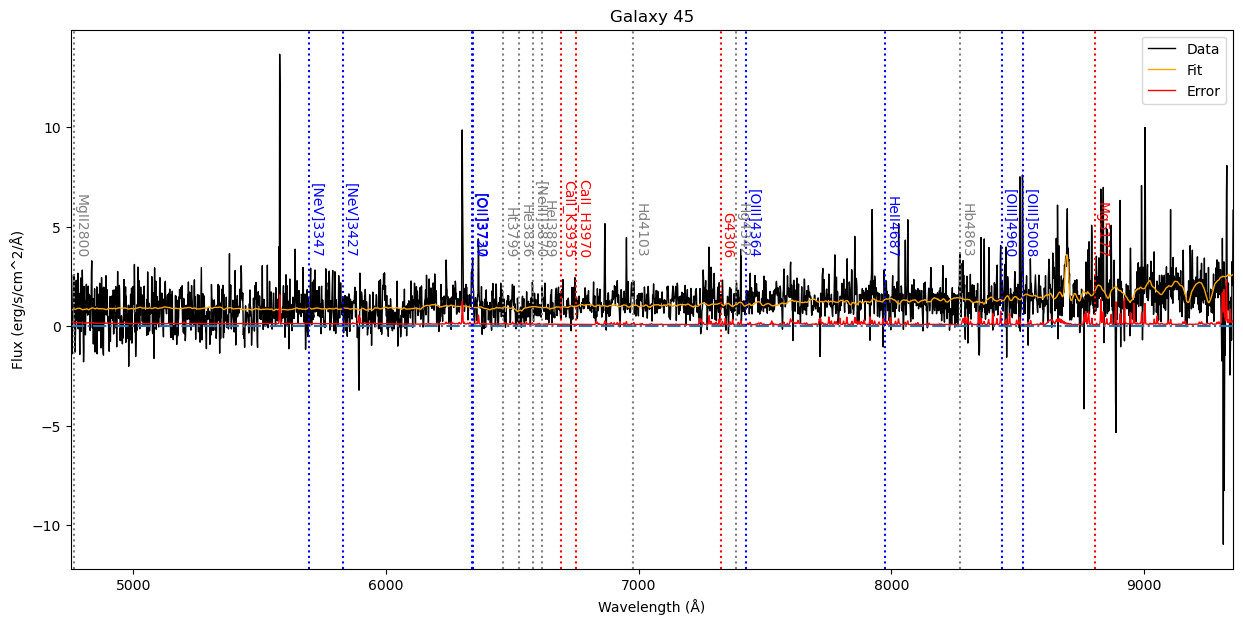

In [20]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_arr, gal_spec_raw, label='Data', color='black', lw=1)
ax.plot(wav_arr, gal_spec_fit, label='Fit', color='orange', lw=1)
ax.plot(wav_arr, gal_spec_err, label='Error', color='red', lw=1)

ax.axhline(0, linestyle='-.')

x_lo = wav_arr[0]
x_hi = wav_arr[-1]

#x_lo = 5500
#x_hi = 5700

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
        
        ax.text(wav_pos, np.max(gal_spec_fit), line_label, rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
#ax.set_ylim(-.5,10)

ax.legend()

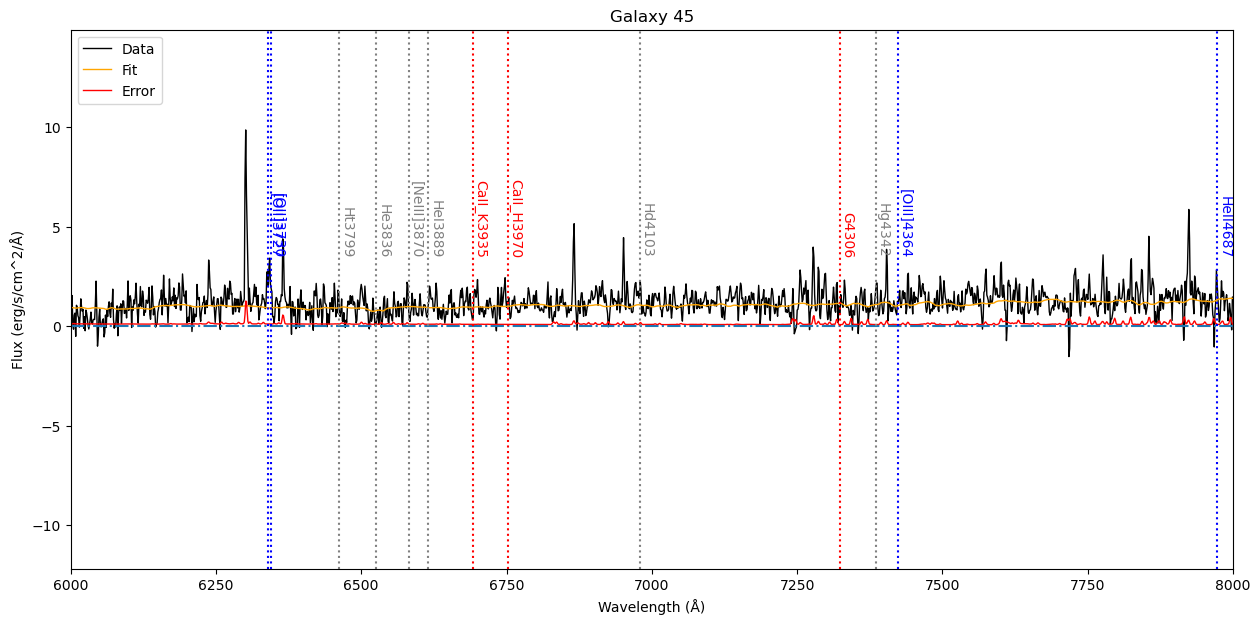

In [57]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_arr, gal_spec_raw, label='Data', color='black', lw=1)
ax.plot(wav_arr, gal_spec_fit, label='Fit', color='orange', lw=1)
ax.plot(wav_arr, gal_spec_err, label='Error', color='red', lw=1)

ax.axhline(0, linestyle='-.')

#x_lo = wav_arr[0]
#x_hi = wav_arr[-1]

x_lo = 6000
x_hi = 8000

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
        
        ax.text(wav_pos, np.max(gal_spec_fit), line_label, rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
#ax.set_ylim(-.5,10)

ax.legend()

Plot $\chi^2$ versus $z$

In [21]:
gal_model_arr = np.loadtxt(rootdir+'gal{}/gal{}_model.dat'.format(gal_id, gal_id), delimiter='\t')

In [22]:
z_arr = gal_model_arr[:,0]
chi_sq_arr = gal_model_arr[:,5]/np.max(gal_model_arr[:,5])

In [23]:
def find_nth_smallest(iterable,n):
    try:
        st = set(iterable)
        for i in range(n-1):
            st.discard(min(st))
        return iterable.index(min(st))
    except: return None

In [24]:
def list_local_minima(x, f):
    
    f_grad = np.gradient(f,x)
    
    minima_loc_list = []
    minima_list = []
    minima_dgrad_list = []
    
    for i in range(len(f)-1):
        
        if(f_grad[i]<0 and f_grad[i+1]>0):
            
            x1 = x[i]
            x2 = x[i+1]
            y1 = f_grad[i]
            y2 = f_grad[i+1]
            
            m = (y2-y1)/(x2-x1)
            b = y1-m*x1
            
            x0 = -b/m
                        
            f_dgrad_x0 = m
            
            f_x0 = f[i] + (m/2)*(x0-x1)**2 + b*(x0-x1)
            
            print(x0, f_x0, f_dgrad_x0, y1, y2)

            minima_loc_list.append(x0)
            minima_list.append(f_x0)
            minima_dgrad_list.append(f_dgrad_x0)
                        
    minima_loc_list_sorted = [x for _,x in sorted(zip(minima_dgrad_list,minima_loc_list))]
    minima_list_sorted = [x for _,x in sorted(zip(minima_dgrad_list,minima_list))]
    minima_dgrad_list_sorted = sorted(minima_dgrad_list)
    
    return minima_loc_list_sorted, minima_list_sorted, minima_dgrad_list_sorted

In [25]:
def find_local_minima(x, f):
    
    minima_loc_list = []
    minima_list = []
    
    for i in range(len(x)-2):
        
        if(f[i]>f[i+1] and f[i+1]<f[i+2]):
            
            minima_loc_list.append(x[i+1])
            minima_list.append(f[i+1])
            
    minima_loc_list_sorted = [x for _,x in sorted(zip(minima_list, minima_loc_list))]
    minima_list_sorted = sorted(minima_list)
    
    return minima_loc_list_sorted, minima_list_sorted

In [26]:
z_lo = 0.855
z_hi = 0.861
idx = (z_arr>=z_lo)&(z_arr<=z_hi)

In [27]:
z_best_list, chi_sq_best_list = find_local_minima(z_arr[idx], chi_sq_arr[idx])
#z_best_list, chi_sq_best_list = find_local_minima(z_arr, chi_sq_arr)

In [28]:
z_best_list

[0.8565000000000275]

In [29]:
next_best_ind = 0

In [30]:
z_next_best = z_best_list[next_best_ind]

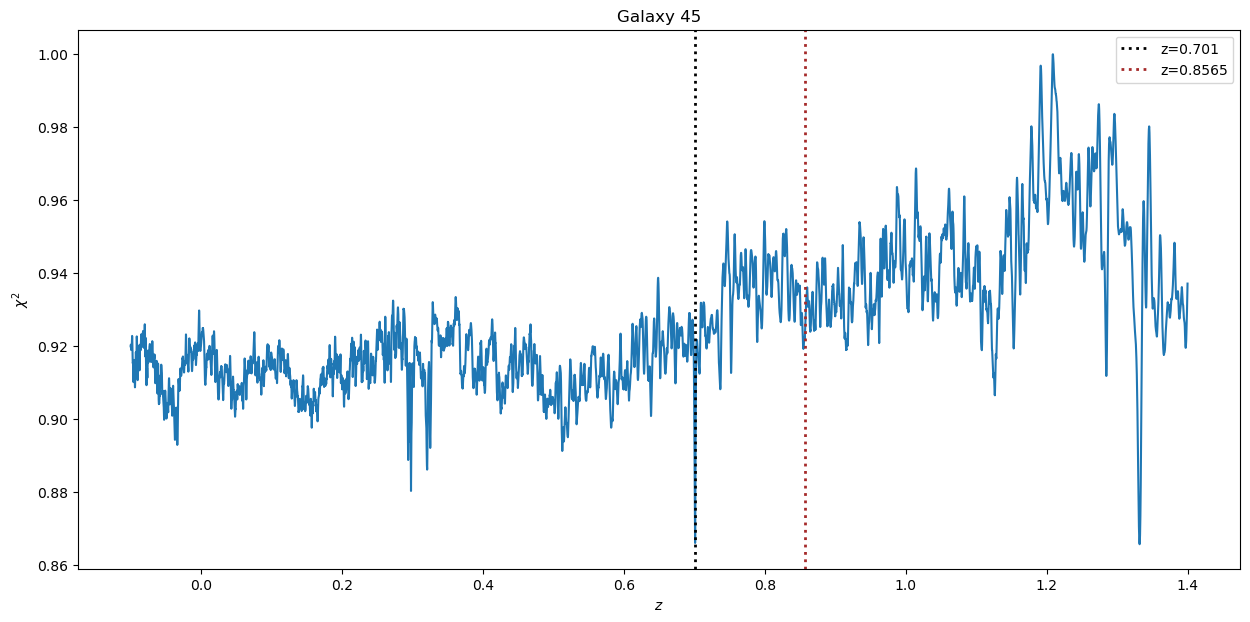

In [31]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(z_arr, chi_sq_arr)

ax.axvline(z_best, color='black', label='z={}'.format(z_best), lw=2, linestyle=':')
ax.axvline(z_next_best, color='brown', label='z='+'%.4f'%np.round(z_next_best,4), lw=2, linestyle=':')
#ax.axvline(0.778, color='brown', label='z=0.778', lw=2, linestyle=':')


ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\chi^2$')
ax.set_title('Galaxy {}'.format(gal_id))

#ax.set_xlim(z_lo,z_hi)

ax.legend()

Generate new fit spectrum

In [32]:
new_ind = np.where(z_arr == z_next_best)[0][0]
new_ind

9565

In [33]:
a_arr = gal_model_arr[:,1]
b_arr = gal_model_arr[:,2]
c_arr = gal_model_arr[:,3]
d_arr = gal_model_arr[:,4]

In [34]:
a_new = a_arr[new_ind]
b_new = b_arr[new_ind]
c_new = c_arr[new_ind]
d_new = d_arr[new_ind]

In [35]:
eigenspec_df = pd.read_csv('/Users/thepoetoftwilight/Documents/CUBS/Data/Eigenspectra/eigen_galaxy_Bolton2012.csv')

In [36]:
wav_eigen = eigenspec_df['wav']
c1 = eigenspec_df['c1']
c2 = eigenspec_df['c2']
c3 = eigenspec_df['c3']
c4 = eigenspec_df['c4']

In [37]:
eigenspec_df = pd.read_csv('/Users/thepoetoftwilight/Documents/CUBS/Data/Eigenspectra/eigen_galaxy_Bolton2012.csv')

In [38]:
wav_eigen = eigenspec_df['wav']
c1 = eigenspec_df['c1']
c2 = eigenspec_df['c2']
c3 = eigenspec_df['c3']
c4 = eigenspec_df['c4']

In [39]:
def z_shift_eigen(z, wav_arr):
    
    wav_eigen_shift = wav_eigen*(1+z)
    
    gal_ind = (wav_eigen_shift>=wav_arr[0])&(wav_eigen_shift<=wav_arr[-1])
    wav_eigen_shift_gal = wav_eigen_shift[gal_ind]
    
    c1_gal = c1[gal_ind]
    c1_gal_interp = np.interp(wav_arr, wav_eigen_shift_gal, c1_gal)

    c2_gal = c2[gal_ind]
    c2_gal_interp = np.interp(wav_arr, wav_eigen_shift_gal, c2_gal)
    
    c3_gal = c3[gal_ind]
    c3_gal_interp = np.interp(wav_arr, wav_eigen_shift_gal, c3_gal)

    c4_gal = c4[gal_ind]
    c4_gal_interp = np.interp(wav_arr, wav_eigen_shift_gal, c4_gal)
    
    return c1_gal_interp, c2_gal_interp, c3_gal_interp, c4_gal_interp

In [40]:
c1_shift, c2_shift, c3_shift, c4_shift = z_shift_eigen(z_next_best, wav_arr)

In [41]:
gal_spec_fit_new = a_new*c1_shift + b_new*c2_shift + c_new*c3_shift + d_new*c4_shift

Find continuum nodes given fluxes and associated errors

In [42]:
def find_cont_nodes(wave, flux, error, npix=501):
    
    continuum = medfilt(flux, npix)
    
    residuals = flux - continuum
    
    sigma = np.std(residuals)
    
    index = np.where(
                (error > 0.0) & (residuals / error > -1.5) & (residuals / error < 2.0))
    
    wave_continuum = wave[index]
    flux_continuum = flux[index]
    
    return index, wave_continuum, flux_continuum

Plot for best redshift

In [43]:
gal_spec_cont_index, gal_spec_cont_wav, gal_spec_cont_flux = find_cont_nodes(wav_arr, gal_spec_raw, gal_spec_err, npix=501)
gal_spec_cont_fit_flux = gal_spec_fit[gal_spec_cont_index]

In [44]:
gal_spec_cont_flux_interp = np.interp(wav_arr, gal_spec_cont_wav, gal_spec_cont_flux)
gal_spec_cont_flux_fit_interp = np.interp(wav_arr, gal_spec_cont_wav, gal_spec_cont_fit_flux)

In [45]:
gal_spec_raw_norm = gal_spec_raw/gal_spec_cont_flux_interp
gal_spec_err_norm = gal_spec_err/gal_spec_cont_flux_interp

In [46]:
gal_spec_fit_norm = gal_spec_fit/gal_spec_cont_flux_fit_interp

In [47]:
n_trim = 40

In [48]:
best_line_indices = []

In [49]:
z_best

0.701

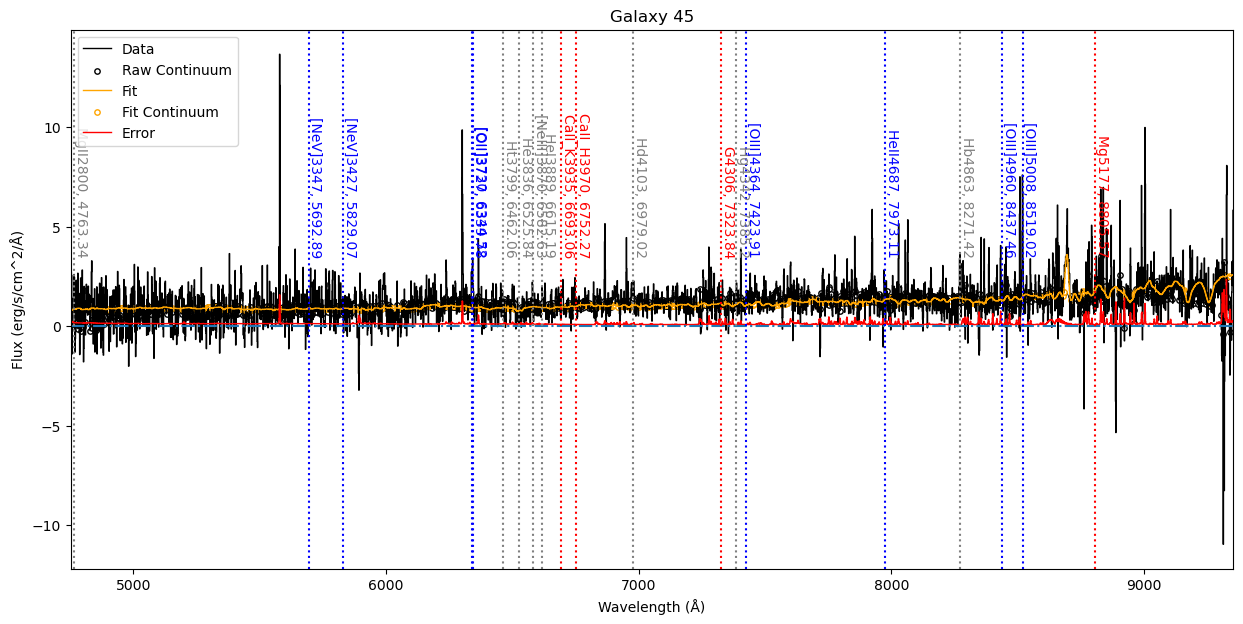

In [50]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.step(wav_arr, gal_spec_raw, label='Data', color='black', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_flux, label='Raw Continuum', facecolor='white', edgecolor='black', s=15)
ax.step(wav_arr, gal_spec_fit, label='Fit', color='orange', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_fit_flux, label='Fit Continuum', facecolor='white', edgecolor='orange', s=15)
ax.step(wav_arr, gal_spec_err, label='Error', color='red', lw=1, where='mid')

ax.axhline(0, linestyle='-.')

x_lo = wav_arr[0]
x_hi = wav_arr[-1]

#x_lo = 8000
#x_hi = 8400

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
        
        best_line_indices.append(j)
        
        ax.text(wav_pos, np.max(gal_spec_fit), line_label+', '+str(np.round(wav_pos,2)), rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
#ax.set_ylim(-10,10)

ax.legend()

In [51]:
z_best

0.701

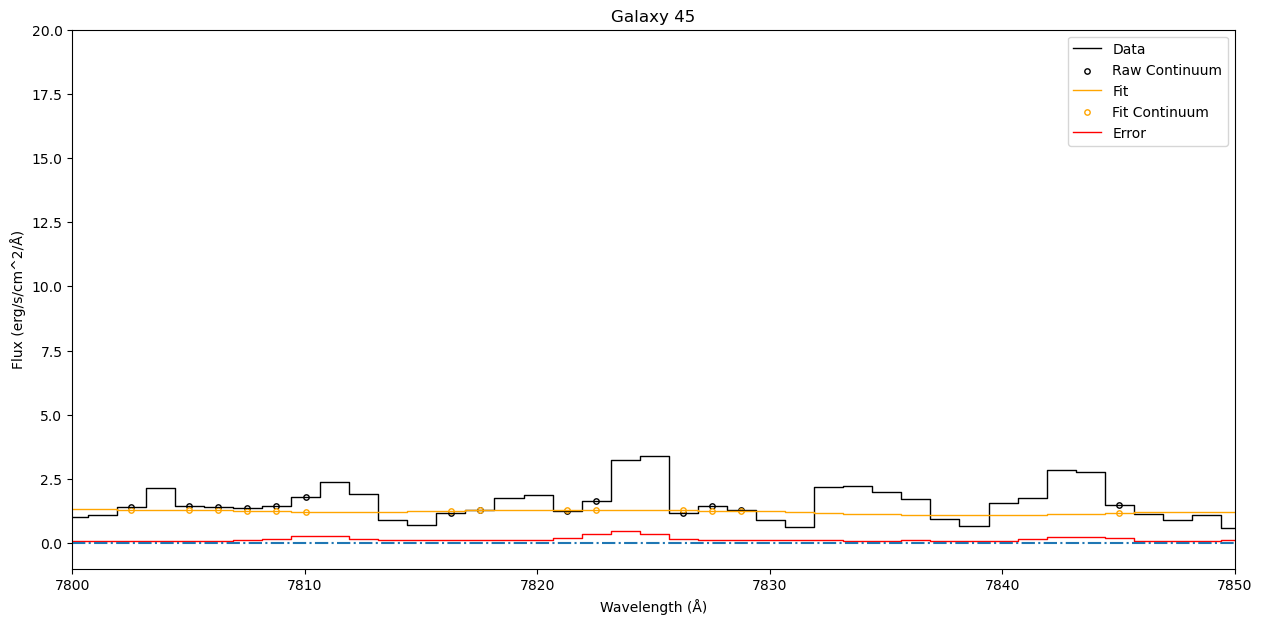

In [52]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.step(wav_arr, gal_spec_raw, label='Data', color='black', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_flux, label='Raw Continuum', facecolor='white', edgecolor='black', s=15)
ax.step(wav_arr, gal_spec_fit, label='Fit', color='orange', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_fit_flux, label='Fit Continuum', facecolor='white', edgecolor='orange', s=15)
ax.step(wav_arr, gal_spec_err, label='Error', color='red', lw=1, where='mid')

ax.axhline(0, linestyle='-.')

#x_lo = wav_arr[0]
#x_hi = wav_arr[-1]

x_lo = 7800
x_hi = 7850

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
                
        ax.text(wav_pos, np.max(gal_spec_fit), line_label+', '+str(np.round(wav_pos,2)), rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
ax.set_ylim(-1,20)

ax.legend()

In [53]:
c = 3e+5

In [54]:
gal_spec_fit_norm[0], 3836.47*(1+z_best)

(0.970635864263351, 6525.83547)

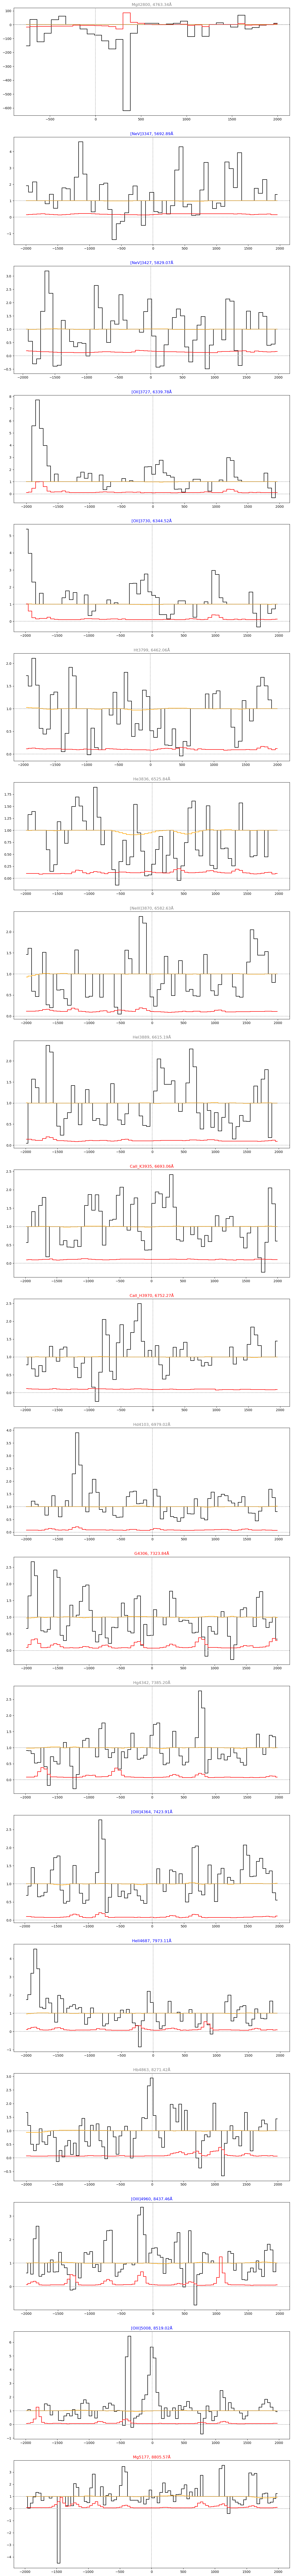

In [55]:
fig, axes = plt.subplots(len(best_line_indices), figsize=(15, 7*len(best_line_indices)))

for i in range(len(best_line_indices)):

    idx = best_line_indices[i]

    wav_0 = atom_lines_wavs[idx]*(1+z_best)

    del_wav = wav_arr-wav_0
    v = c*del_wav/wav_0
    
    ax = axes[i]

    plot_idx = (v>-2000) & (v<2000)
        
    ax.step(v[plot_idx], gal_spec_raw_norm[plot_idx], color='black', where='mid')
    ax.step(v[plot_idx], gal_spec_fit_norm[plot_idx], color='orange', where='mid')
    ax.step(v[plot_idx], gal_spec_err_norm[plot_idx], color='red', where='mid')

    ax.axhline(0, color='gray', linestyle=':')
    ax.axhline(1, color='gray', linestyle=':')

    ax.axvline(0, color='gray', linestyle=':')

    ax.set_title(atom_line_legends[idx] + ', ' + '%.2f'%np.round(wav_0, 2) + 'Å', color=color_dict[atom_line_types[idx]])
    
    #ax.set_ylim(-15, 15)

Plot for next best redshift

In [56]:
gal_spec_cont_fit_new_flux = gal_spec_fit_new[gal_spec_cont_index]
gal_spec_cont_flux_fit_new_interp = np.interp(wav_arr, gal_spec_cont_wav, gal_spec_cont_fit_new_flux)
gal_spec_fit_new_norm = gal_spec_fit_new/gal_spec_cont_flux_fit_new_interp

In [56]:
best_line_indices_new = []

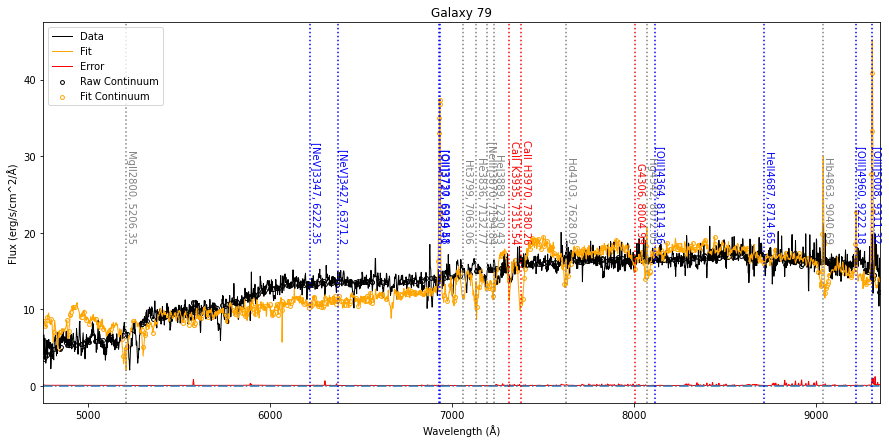

In [57]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav_arr, gal_spec_raw, label='Data', color='black', lw=1)
ax.scatter(gal_spec_cont_wav, gal_spec_cont_flux, label='Raw Continuum', facecolor='white', edgecolor='black', s=15)
ax.plot(wav_arr, gal_spec_fit_new, label='Fit', color='orange', lw=1)
ax.scatter(gal_spec_cont_wav, gal_spec_cont_fit_new_flux, label='Fit Continuum', facecolor='white', edgecolor='orange', s=15)
ax.plot(wav_arr, gal_spec_err, label='Error', color='red', lw=1)

ax.axhline(0, linestyle='-.')

x_lo = wav_arr[0]
x_hi = wav_arr[-1]

#x_lo = 8000
#x_hi = 8400

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_next_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
        
        best_line_indices_new.append(j)
        
        ax.text(wav_pos, np.max(gal_spec_fit), line_label+', '+str(np.round(wav_pos,2)), rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
#ax.set_ylim(-.5,10)

ax.legend()

In [58]:
z_next_best

0.8592000000000275

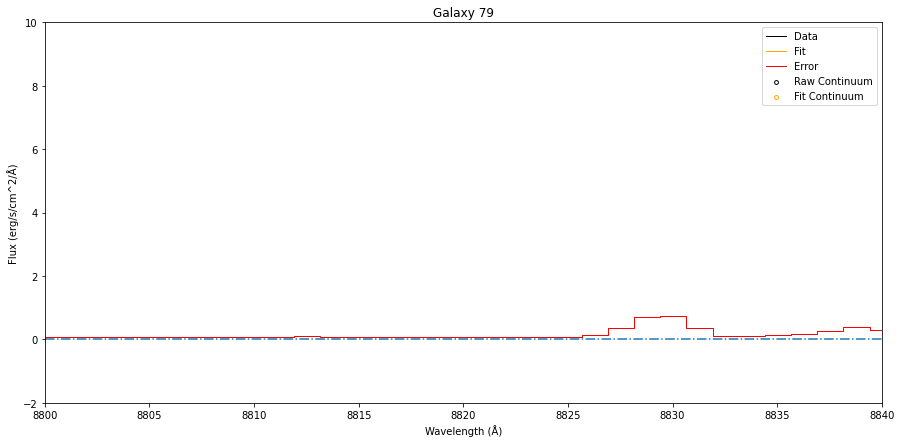

In [59]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.step(wav_arr, gal_spec_raw, label='Data', color='black', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_flux, label='Raw Continuum', facecolor='white', edgecolor='black', s=15)
ax.step(wav_arr, gal_spec_fit_new, label='Fit', color='orange', lw=1, where='mid')
ax.scatter(gal_spec_cont_wav, gal_spec_cont_fit_new_flux, label='Fit Continuum', facecolor='white', edgecolor='orange', s=15)
ax.step(wav_arr, gal_spec_err, label='Error', color='red', lw=1, where='mid')

ax.axhline(0, linestyle='-.')

#x_lo = wav_arr[0]
#x_hi = wav_arr[-1]

x_lo = 8800
x_hi = 8840

for j in range(len(atom_line_legends)):

    wav_pos = atom_lines_wavs[j]*(1+z_next_best)
    line_label = atom_line_legends[j]
    line_type = atom_line_types[j]

    if(wav_pos>=x_lo and wav_pos<=x_hi):
        
        ax.text(wav_pos, np.max(gal_spec_fit), line_label+', '+str(np.round(wav_pos,2)), rotation=270, color=color_dict[line_type])
        ax.axvline(wav_pos, color=color_dict[line_type], linestyle=':')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.set_xlim(x_lo,x_hi)
ax.set_ylim(-2,10)

ax.legend()

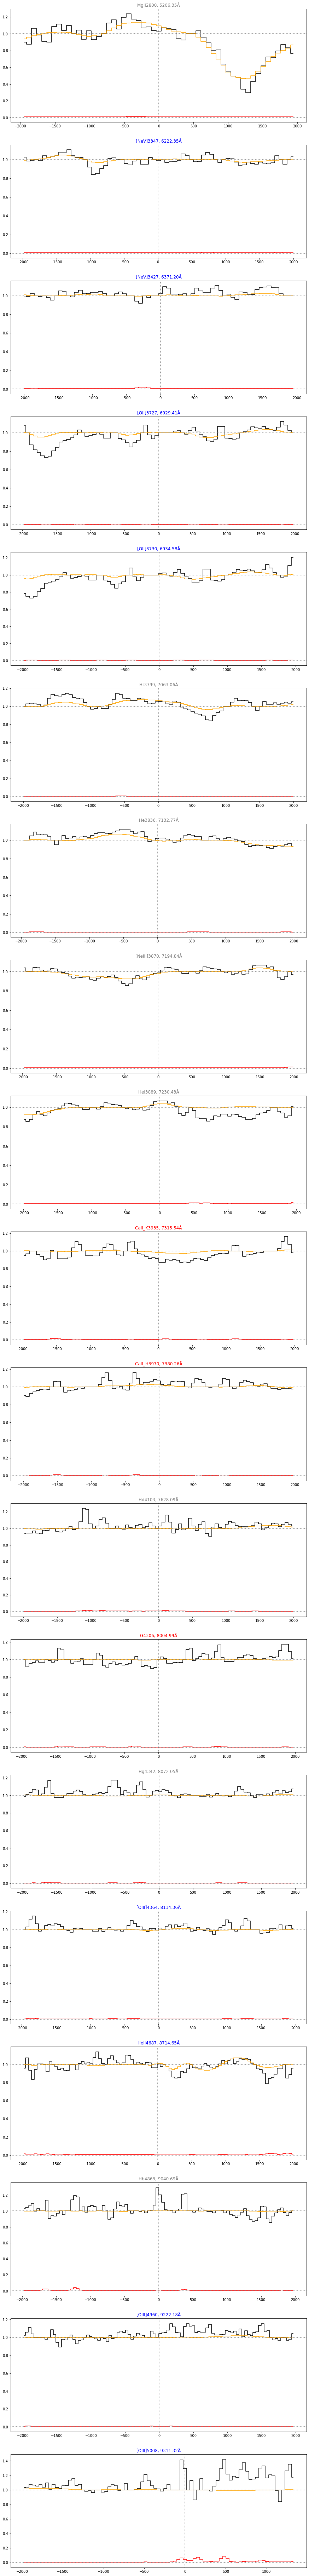

In [60]:
fig, axes = plt.subplots(len(best_line_indices_new), figsize=(15, 7*len(best_line_indices_new)))

for i in range(len(best_line_indices_new)):

    idx = best_line_indices_new[i]

    wav_0 = atom_lines_wavs[idx]*(1+z_next_best)

    del_wav = wav_arr-wav_0
    v = c*del_wav/wav_0
    
    ax = axes[i]

    plot_idx = (v>-2000) & (v<2000)
        
    ax.step(v[plot_idx], gal_spec_raw_norm[plot_idx], color='black', where='mid')
    ax.step(v[plot_idx], gal_spec_fit_norm[plot_idx], color='orange', where='mid')
    ax.step(v[plot_idx], gal_spec_err_norm[plot_idx], color='red', where='mid')

    ax.axhline(0, color='gray', linestyle=':')
    ax.axhline(1, color='gray', linestyle=':')

    ax.axvline(0, color='gray', linestyle=':')

    ax.set_title(atom_line_legends[idx], color=color_dict[atom_line_types[idx]])
    
    ax.set_title(atom_line_legends[idx] + ', ' + '%.2f'%np.round(wav_0, 2) + 'Å', color=color_dict[atom_line_types[idx]])
    
    #ax.set_ylim(-10,10)

In [61]:
'%.4f'%np.round(z_best, 4)

'0.3286'

In [62]:
'%.4f'%np.round(z_next_best, 4)

'0.8592'